### 데이터 및 라이브러리 준비

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 라이브러리 불러오기
import pandas as pd # 판다스 데이터분석 패키지
import xgboost as xgb # XGBoost
from xgboost import plot_importance # XGBoost 중요도 결과 시각화를 위함
import numpy as np  
import matplotlib.pyplot as plt # 시각화 전용 라이브러리
from sklearn.datasets import load_breast_cancer # 유방암 데이터자료
from sklearn.model_selection import train_test_split # 훈련,평가 자료 분리

# 데이터 불러오기
cancer_data = load_breast_cancer()

cancer_feature = cancer_data.data # 수치 데이터
cancer_target = cancer_data.target # 레이블값 (암=1, 정상=0)

# 데이터 형태변환(판다스 데이터프레임)
cancer = pd.DataFrame(data=cancer_feature, columns=cancer_data.feature_names)

cancer['Y/N'] = cancer_data.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y/N
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 데이터 탐색

In [3]:
cancer.shape

(569, 31)

In [4]:
cancer.describe() # cancer데이터 기초통계량

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y/N
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
print(cancer['Y/N'].value_counts()) # 라벨 값별 갯수 출력

1    357
0    212
Name: Y/N, dtype: int64


### 데이터 분리

In [7]:
# train, test 자료 분리 ( 8:2 )

x_train, x_test, y_train, y_test = train_test_split(cancer_feature, cancer_target,
                                                   test_size=0.2, random_state=21)
print('학습용 자료 길이 : ',len(x_train),'실험용 자료 길이: ',len(x_test))

학습용 자료 길이 :  455 실험용 자료 길이:  114


***DMatrix?***
  + XGBoost에서 사용하는 XGB만의 전용 데이터 세트 형태
  + Feature(설명변수) 와 label(종속변수)값을 파라미터로 넣는다.

In [8]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

### 모델 생성 및 학습

In [9]:
params = {'max_depth':3, # 트리의 최대 깊이. 클수록 복잡해지며 과적합되기 쉽다.
         'eta':0.1, # 학습률. 낮을수록 과적합 위험은 줄어든다.
         'objective':'binary:logistic', # 목적함수 설정 : 이진분류를 위한 로지스틱 회귀
         'eval_metric':'logloss', # 계산방법 설정. 분류문제 Default는 error
         'early_stoppings':100} # 조기 종료 옵션. 최대 나무수 
num_round = 200 # 부스팅 반복 횟수
xgb_model = xgb.train(params, dtrain, num_round) 
# make prediction
pred_probs = xgb_model.predict(dtest)

[08:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




### 주요 특성 시각화

In [10]:
# 예측값엔 클래스에 대한 확률값이 들어있다. 
pred_probs[0:4]  # 0.5 이상일시 악성(유방암)일 확률이 더 높음을 의미.

array([0.9986084 , 0.98075074, 0.05497364, 0.00347564], dtype=float32)

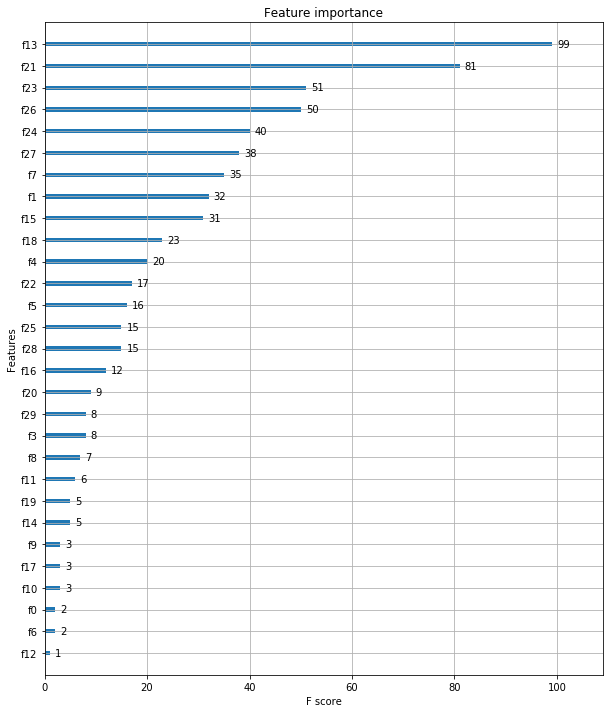

In [11]:
# 0또는 1로 변경
y_preds = [1 if x>0.5 else 0 for x in pred_probs]

# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) # from xgboost import plot_importance코드 필요

### 모델 성능 측정

In [12]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [13]:
def get_clf_eval(y_test, y_pred): # 성능 지표 함수 정의
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    # 결과 출력
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [14]:
get_clf_eval(y_test, y_preds) # 최종 예측 성능

오차행렬:
 [[37  2]
 [ 2 73]]

정확도: 0.9649
정밀도: 0.9733
재현율: 0.9733
F1: 0.9733
AUC: 0.9610


### 연습 예제

예제1)

기존 학습률 0.1일 때의 예측 결과와, 

학습률 0.3, 0.7 일 때의 예측 결과를 비교하고 모델 성능을 비교해 보시오

In [29]:
params

{'max_depth': 3,
 'eta': 1.0,
 'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'early_stoppings': 100}

In [44]:
eta_list = [0.1, 0.3, 0.7] #비교하고자 하는 학습률

for eta in eta_list:
    print('학습률 : \n',eta)
    params['eta'] = eta
    params['early_stoppings'] = None
    num_round = 200 # 부스팅 반복 횟수
    xgb_model = xgb.train(params, dtrain, num_round)
    # 예측 값 생성
    pred_probs = xgb_model.predict(dtest)
    y_preds = [1 if x>0.5 else 0 for x in pred_probs]
    # 예측 성능 비교
    get_clf_eval(y_test, y_preds) # 최종 예측 성능

학습률 : 
 0.1
오차행렬:
 [[37  2]
 [ 2 73]]

정확도: 0.9649
정밀도: 0.9733
재현율: 0.9733
F1: 0.9733
AUC: 0.9610
학습률 : 
 0.3
오차행렬:
 [[37  2]
 [ 3 72]]

정확도: 0.9561
정밀도: 0.9730
재현율: 0.9600
F1: 0.9664
AUC: 0.9544
학습률 : 
 0.7
오차행렬:
 [[36  3]
 [ 0 75]]

정확도: 0.9737
정밀도: 0.9615
재현율: 1.0000
F1: 0.9804
AUC: 0.9615


예제2)

scikit learn의 iris데이터를 불러와서 위의 xgb모델을 적용 및 예측 해보시오
(Hint: 목적함수 objective를 multi:softmax로 변경 할 것)

In [49]:
from sklearn import datasets 
import pandas as pd 

# 데이터 불러오기
iris = datasets.load_iris() 
features = iris.data 
species = iris.target

iris = pd.DataFrame(data=features, columns = iris.feature_names)
iris['Species'] = species
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [82]:
# train, test 자료 분리 ( 7:3 )

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:], iris['Species'],
                                                   shuffle=True,test_size=0.3, random_state=21)
print('학습용 자료 길이 : ',len(x_train),'실험용 자료 길이: ',len(x_test))

학습용 자료 길이 :  105 실험용 자료 길이:  45


In [92]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)
params = {'max_depth':3,
         'eta':0.1, 
         'objective':'multi:softmax',
         'eval_metric':'logloss',
         'num_class':3,
         'early_stoppings': None} 
num_round = 30 # 부스팅 반복 횟수
xgb_model = xgb.train(params, dtrain, num_round) 
# make prediction
pred_probs = xgb_model.predict(dtest)

In [90]:
pred_probs # 최종 예측 결과 ( 3개의 클래스 = 품종, 멀티라벨 예측 )

array([1., 0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 1., 2., 2., 0., 1., 2.,
       1., 0., 2., 2., 1., 1., 1., 0., 1., 0., 0., 1., 2., 0., 2., 1., 0.,
       2., 1., 1., 2., 0., 2., 2., 2., 2., 1., 2.], dtype=float32)

In [89]:
accuracy_score(y_test, pred_probs) # precision등의 지표는 multilabel에 맞추어 별도의 조작이 더 필요하다

1.0